<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#基本参数" data-toc-modified-id="基本参数-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>基本参数</a></span></li><li><span><a href="#实战" data-toc-modified-id="实战-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>实战</a></span><ul class="toc-item"><li><span><a href="#流程" data-toc-modified-id="流程-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>流程</a></span></li><li><span><a href="#数据获取-&amp;-数据探索" data-toc-modified-id="数据获取-&amp;-数据探索-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>数据获取 &amp; 数据探索</a></span></li><li><span><a href="#数据清洗-&amp;-特征选择" data-toc-modified-id="数据清洗-&amp;-特征选择-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>数据清洗 &amp; 特征选择</a></span></li><li><span><a href="#模型训练" data-toc-modified-id="模型训练-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>模型训练</a></span></li><li><span><a href="#模型评估" data-toc-modified-id="模型评估-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>模型评估</a></span></li></ul></li><li><span><a href="#总结" data-toc-modified-id="总结-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>总结</a></span></li><li><span><a href="#练习" data-toc-modified-id="练习-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>练习</a></span></li></ul></div>

## 基本参数

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30)

n_neighbors：K 值，代表邻居的数量。太大容易过拟合，太小容易欠拟合。默认为 5；

weights：邻居的权重：
    1. weights=uniform：所有邻居的权重相同；
    1. weights=distance，权重是距离的倒数；
    1. 自定义不同距离所对应的权重（绝大多数情况下不需要）。
    
algorithm：用来计算邻居的方法：
    1. algorithm='auto'：根据数据情况自动选择合适算法；
    1. algorithm='kd_tree'：KD 树，适用于维度少的情况，一般不超过 20，否则效率会下降；
    1. algorithm='ball_tree'：球树，类似于 KD 树，不过更适用于维度大的情况；
    1. algorithm='brute'：暴力搜索，不通过构造树结构进行搜索，采用线性扫描。数据集大的话，效率很低。
    
leaf_size：构造 KD 树或球树时的叶子数，默认是 30。

## 实战

### 流程

<img src="https://static001.geekbang.org/resource/image/8a/78/8af94562f6bd3ac42036ec47f5ad2578.jpg" style="width:500px">

### 数据获取 & 数据探索

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


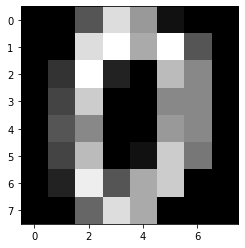

In [6]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
data = digits.data

print(data.shape)

print(digits.images[0])

print(digits.target[0])

plt.gray()
plt.imshow(digits.images[0])
plt.show()

### 数据清洗 & 特征选择

In [8]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(
    data, digits.target, test_size=0.25, random_state=33)

# 将数据 Z-Score 规范化
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)

### 模型训练

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(train_ss_x, train_y)
predict_y = knn.predict(test_ss_x)
print("KNN 准确率：%.4lf" % accuracy_score(test_y, predict_y))

KNN 准确率：0.9756


### 模型评估

对比 SVM、朴素贝叶斯和决策树分类，看下哪个分类器的效果更好：

***
下面使用 SVM 算法：

In [14]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(train_ss_x,train_y)
predict_y=svm.predict(test_ss_x)
print('SVM 准确率：%.4lf' % accuracy_score(test_y, predict_y))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM 准确率：0.9867


***
下面使用多项式朴素贝叶斯算法：

In [17]:
from sklearn.naive_bayes import MultinomialNB

# 采用 Min-Max 规范化
mm = preprocessing.MinMaxScaler()
train_mm_x = mm.fit_transform(train_x)
test_mm_x = mm.transform(test_x)

mnb = MultinomialNB()
mnb.fit(train_mm_x, train_y)
predict_y=mnb.predict(test_mm_x)
print('多项式朴素贝叶斯准确率：%.4lf' % accuracy_score(test_y, predict_y))

多项式朴素贝叶斯准确率：0.8844


**注意**：在做多项式朴素贝叶斯分类时，传入的数据不能有负值。因为 Z-Score 会将数值规范化为一个标准的正态分布（即均值为 0，方差为 1），数值会包含负值。因此，上面采用 Min-Max 规范化，将数据规范到[0,1]之间。

多项式分布是二次分布的推广，其不能存在负数。

***
下面使用决策树分类：

In [16]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(train_mm_x,train_y)
predict_y=dtc.predict(test_mm_x)
print("CART 决策树准确率：%.4lf" % accuracy_score(test_y,predict_y))

CART 决策树准确率：0.8556


## 总结

![](https://static001.geekbang.org/resource/image/d0/e1/d08f489c3bffaacb6910f32a0fa600e1.png)

1. 如果数据比较零散，可以使用 Min-Max 规范化；如果数据符合高斯分布，可以使用 Z-Score 规范化。

1. 多项式分布不会存在负数；高斯分布可以存在负数。

1. 算法需要先 fit 拟合，才可以进行 transform。

1. preprocessing.StandardScaler 和 preprocessing.scale 的区别：preprocessing.StandardScore 保存训练集的参数，可直接使用来转化测试集。
（这就是`train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)`的原因）

## 练习

1. KNN 分类器的常用构造函数有哪些？功能函数有哪些？KNN 使用的理解？

1. 如果把 KNN 中的 K 值设置为 200，数据集还是 sklearn 中的手写数据集，再跑一遍程序，看看分类器的准确率是多少。估计会因为 K 值过大，出现过拟合现象，导致准确率下降。